We'll use the Mall Customers Dataset, which contains:

Annual Income (Customer's income)
Spending Score (How much they spend)
Age (Customer's age)

In [13]:
import numpy as np

import pandas as pd

import kagglehub

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [14]:

# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 2: Preprocessing

Remove unnecessary columns (CustomerID, Gender isn't needed for clustering).
Scale the features (StandardScaler ensures all values are on the same scale).

In [15]:
# Select relevant features

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
# Standardize the data

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

In [17]:
# Convert back to DataFrame

X = pd.DataFrame(scaled_features, columns=features.columns)

 Step 3: Find the Optimal Number of Clusters (n_components)

We'll use AIC & BIC to select the best number of clusters.

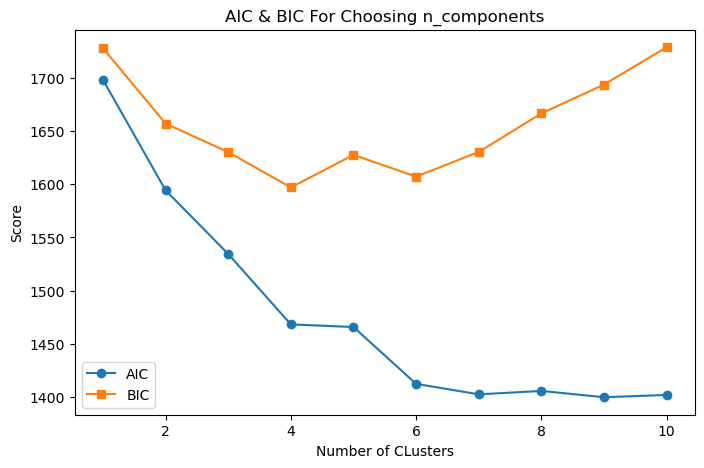

In [18]:
n_components_range = range(1,11)

aic_values = []

bic_values = []

for n in n_components_range:

    gmm = GaussianMixture(n_components=n,covariance_type='full',random_state=42)

    gmm.fit(X)

    aic_values.append(gmm.aic(X))

    bic_values.append(gmm.bic(X))


# Plot AIC & BIC

plt.figure(figsize=(8,5))

plt.plot(n_components_range,aic_values, label='AIC', marker='o')

plt.plot(n_components_range,bic_values, label='BIC', marker='s')

plt.xlabel('Number of CLusters')

plt.ylabel('Score')

plt.legend()

plt.title('AIC & BIC For Choosing n_components')

plt.show()

Step 4: Fit the GMM Model

Based on AIC/BIC, let's fit GMM with the optimal number of clusters.


In [19]:
# Train GMM with optimal number of clusters (assume best is 5)

gmm = GaussianMixture(n_components=5, covariance_type='full',random_state=42)

gmm.fit(X)

GaussianMixture(n_components=5, random_state=42)

In [20]:
# Predict cluster labels

labels = gmm.predict(X)

df['Cluster'] = labels # Assign labels to the original dataframe

# Print cluster probabilities for first 5 customers

print(pd.DataFrame(gmm.predict_proba(X)).head())

              0             1         2             3             4
0  6.651040e-02  2.344199e-10  0.933490  8.217130e-08  2.350964e-09
1  4.988868e-10  4.824539e-07  0.994952  5.047448e-03  2.900685e-19
2  9.999943e-01  1.087389e-18  0.000005  5.672397e-16  6.986911e-07
3  4.438146e-09  1.764104e-06  0.994604  5.394218e-03  8.248916e-18
4  9.843822e-01  6.570201e-07  0.015299  3.161728e-04  1.726135e-06


✅ Each customer now has a probabilistic assignment to different clusters!

Step 5: Evaluate Clustering Quality

We'll use:
Silhouette Score (higher is better)


Davies-Bouldin Index (lower is better)

In [21]:
sil_score = silhouette_score(X,labels)

bouldin_score = davies_bouldin_score(X,labels)

print(f"Silhouette Score: {sil_score:.3f}")

print(f"Davies-Bouldin Index: {bouldin_score:.3f}")


Silhouette Score: 0.376
Davies-Bouldin Index: 0.890


✅ Compare different GMM settings (n_components, covariance types) using these scores.

Step 6: Visualizing the Clusters

Since we have 3 features (Age, Income, Spending Score), we’ll use pairplots & PCA.

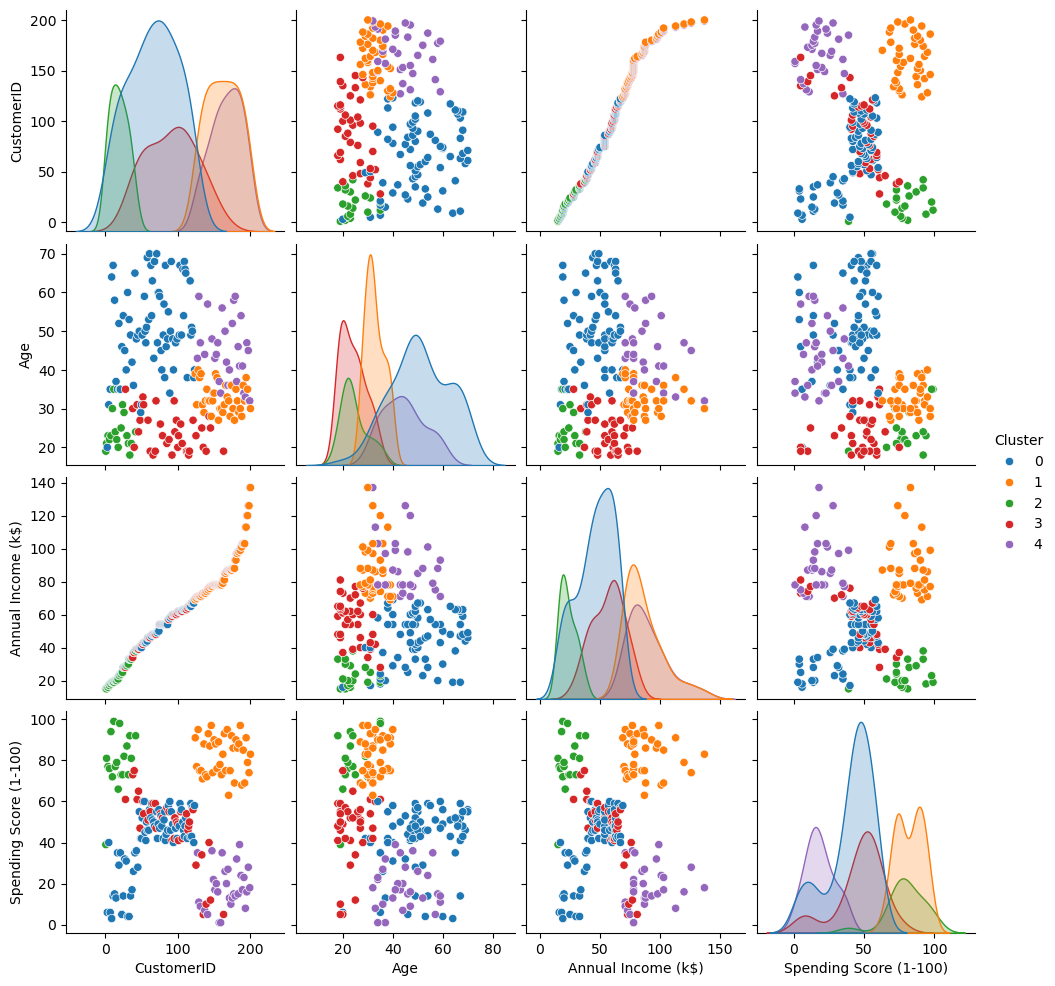

In [22]:
sns.pairplot(df, hue='Cluster', palette='tab10',diag_kind='kde')

plt.show()

 Step 7: PCA Visualization

In [23]:
# Reduce to 2D using PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

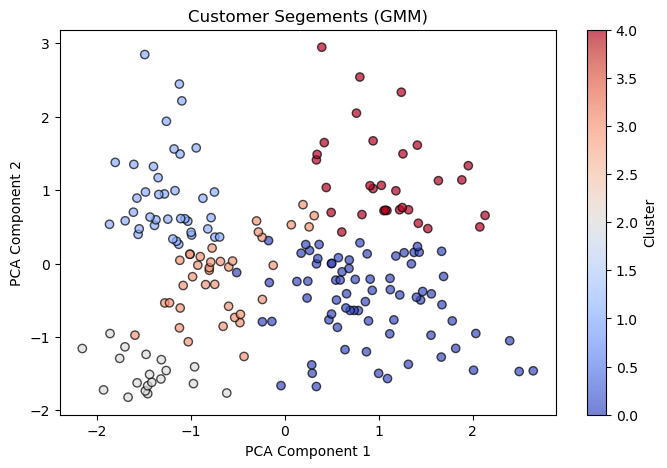

In [24]:
# Scatter plot

plt.figure(figsize=(8,5))

plt.scatter(X_pca[:,0],X_pca[:,1], c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7)

plt.xlabel('PCA Component 1')

plt.ylabel('PCA Component 2')

plt.title('Customer Segements (GMM)')

plt.colorbar(label='Cluster')

plt.show()

 Step 8: Understanding the Clusters

In [25]:
# Group by cluster and check average values


cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        50.851351           46.229730               40.635135
1        32.692308           86.538462               82.128205
2        24.526316           23.315789               79.526316
3        24.054054           56.486486               47.189189
4        44.387097           89.774194               18.483871


 Example insights from clusters:

Cluster 0 → High spenders with high income.

Cluster 1 → Young customers with low income but high spending.

Cluster 2 → Older customers with moderate spending habits.

Cluster 3 → Budget-conscious customers with low spending.